<a href="https://colab.research.google.com/github/hosseinrezaie0/Heart-Failure-Prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, log_loss

### Preprocess the data

In [2]:
# Download the dataset
# https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


# Load the dataset
df = pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


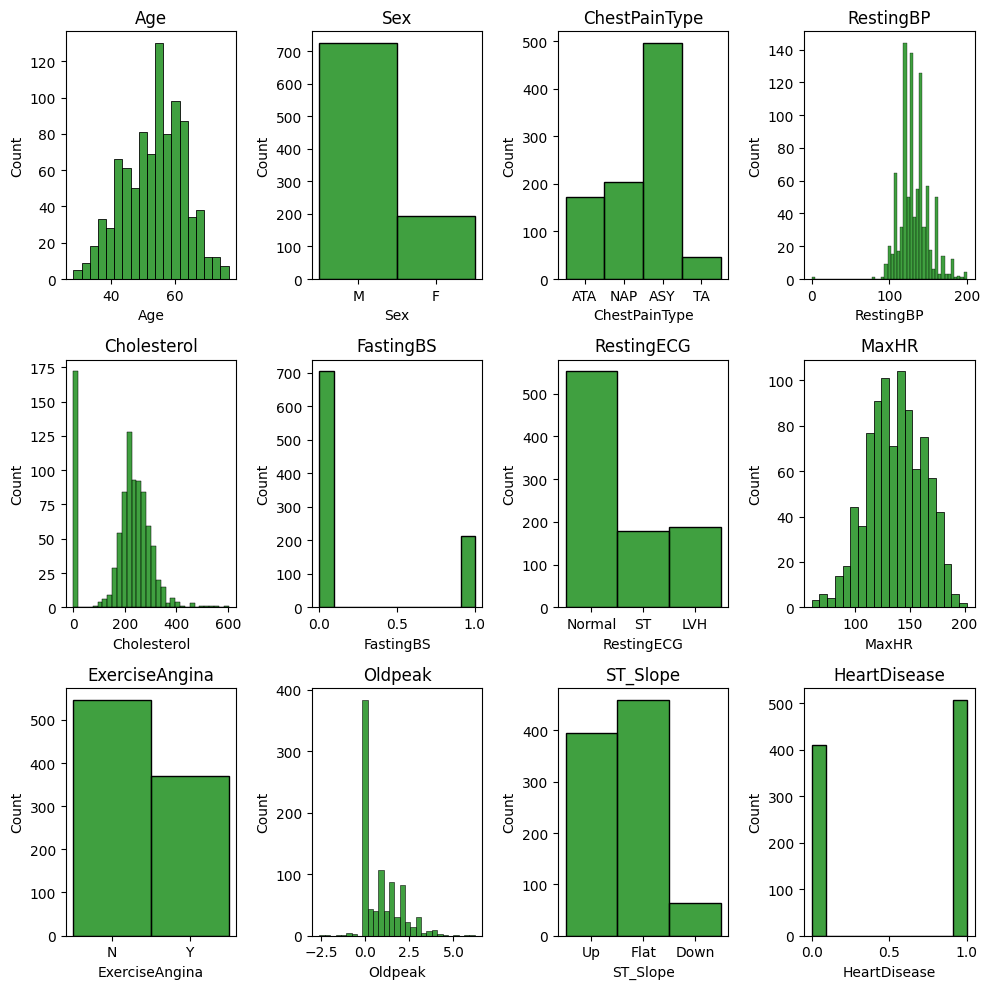

In [4]:
fig, axes = plt.subplots(3,4, figsize=(10,10))
axes = axes.flatten()

for i, col_name in enumerate(df.columns):
  sns.histplot(data=df[col_name], ax= axes[i], color='Green')
  axes[i].set_title(col_name)

plt.tight_layout()
plt.show()

#### Handle Cholesterol = 0

In [5]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


In [6]:
df['Cholesterol'].describe().T

,Cholesterol
count,918.000000
mean,198.799564
std,109.384145
min,0.000000
25%,173.250000
50%,223.000000
75%,267.000000
max,603.000000


In [7]:
df[df['Cholesterol'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,172.0,56.238372,8.616327,32.0,51.75,57.50,62.00,74.0
RestingBP,172.0,129.680233,22.971558,0.0,115.00,129.00,140.00,200.0
Cholesterol,172.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.0
FastingBS,172.0,0.517442,0.501155,0.0,0.00,1.00,1.00,1.0
MaxHR,172.0,121.988372,24.166331,60.0,108.00,120.00,138.25,182.0
Oldpeak,172.0,0.825581,1.039645,-2.6,0.00,0.75,1.50,3.7
HeartDisease,172.0,0.883721,0.321495,0.0,1.00,1.00,1.00,1.0


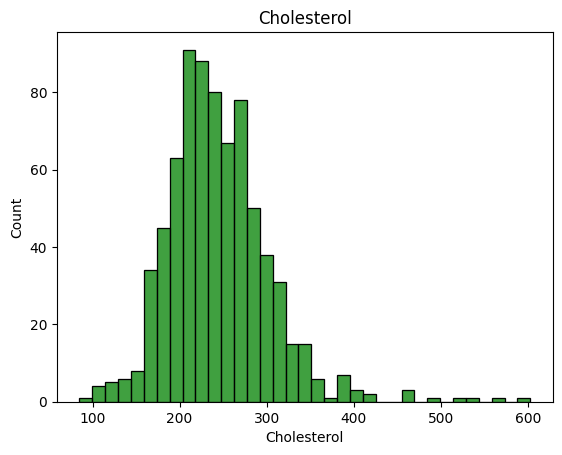

In [8]:
ax = sns.histplot(data=df[df['Cholesterol'] != 0]['Cholesterol'], color='Green')
ax.set_title('Cholesterol')
plt.show()

In [9]:
df[df['Cholesterol'] == 0]['HeartDisease'].value_counts(normalize=True)

,proportion
HeartDisease,
1,0.883721
0,0.116279


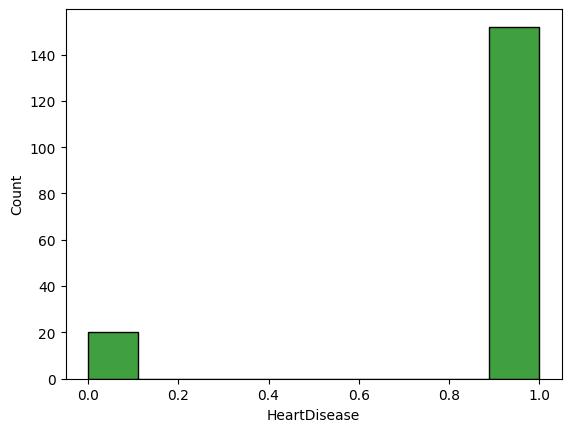

In [10]:
sns.histplot(data=df[df['Cholesterol'] == 0]['HeartDisease'], color='Green')
plt.show()

In [11]:
# Zero Cholesterol is impossible in real world so these data points are probably representing null values.
# since about 20 percent of the data points have a cholesterol of 0, we can't just remove them.
# Instead, we can replace the 0 values with the mean cholesterol value.

df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].mean())

In [12]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
198.799564,172
254.000000,11
220.000000,10
223.000000,10
204.000000,9
...,...
353.000000,1
278.000000,1
157.000000,1


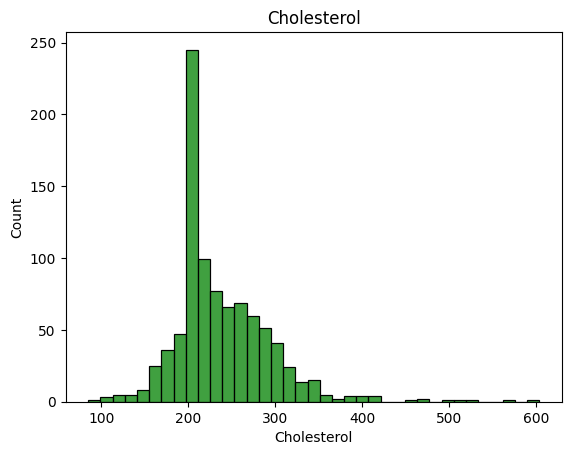

In [13]:
ax = sns.histplot(data=df['Cholesterol'], color='Green')
ax.set_title('Cholesterol')
plt.show()

#### Normalize non categorical columns

In [14]:
scaler = MinMaxScaler()
non_categorical_cols = df.select_dtypes(exclude='object').columns
df[non_categorical_cols] = scaler.fit_transform(df[non_categorical_cols])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,M,ATA,0.70,0.393822,0.0,Normal,0.788732,N,0.295455,Up,0.0
1,0.428571,F,NAP,0.80,0.183398,0.0,Normal,0.676056,N,0.409091,Flat,1.0
2,0.183673,M,ATA,0.65,0.382239,0.0,ST,0.267606,N,0.295455,Up,0.0
3,0.408163,F,ASY,0.69,0.249035,0.0,Normal,0.338028,Y,0.465909,Flat,1.0
4,0.530612,M,NAP,0.75,0.212355,0.0,Normal,0.436620,N,0.295455,Up,0.0


#### Convert categorical text data to numbers

In [15]:
encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
  df[col] = encoder.fit_transform(df[col])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.393822,0.0,1,0.788732,0,0.295455,2,0.0
1,0.428571,0,2,0.80,0.183398,0.0,1,0.676056,0,0.409091,1,1.0
2,0.183673,1,1,0.65,0.382239,0.0,2,0.267606,0,0.295455,2,0.0
3,0.408163,0,0,0.69,0.249035,0.0,1,0.338028,1,0.465909,1,1.0
4,0.530612,1,2,0.75,0.212355,0.0,1,0.436620,0,0.295455,2,0.0


#### Plot the correlations

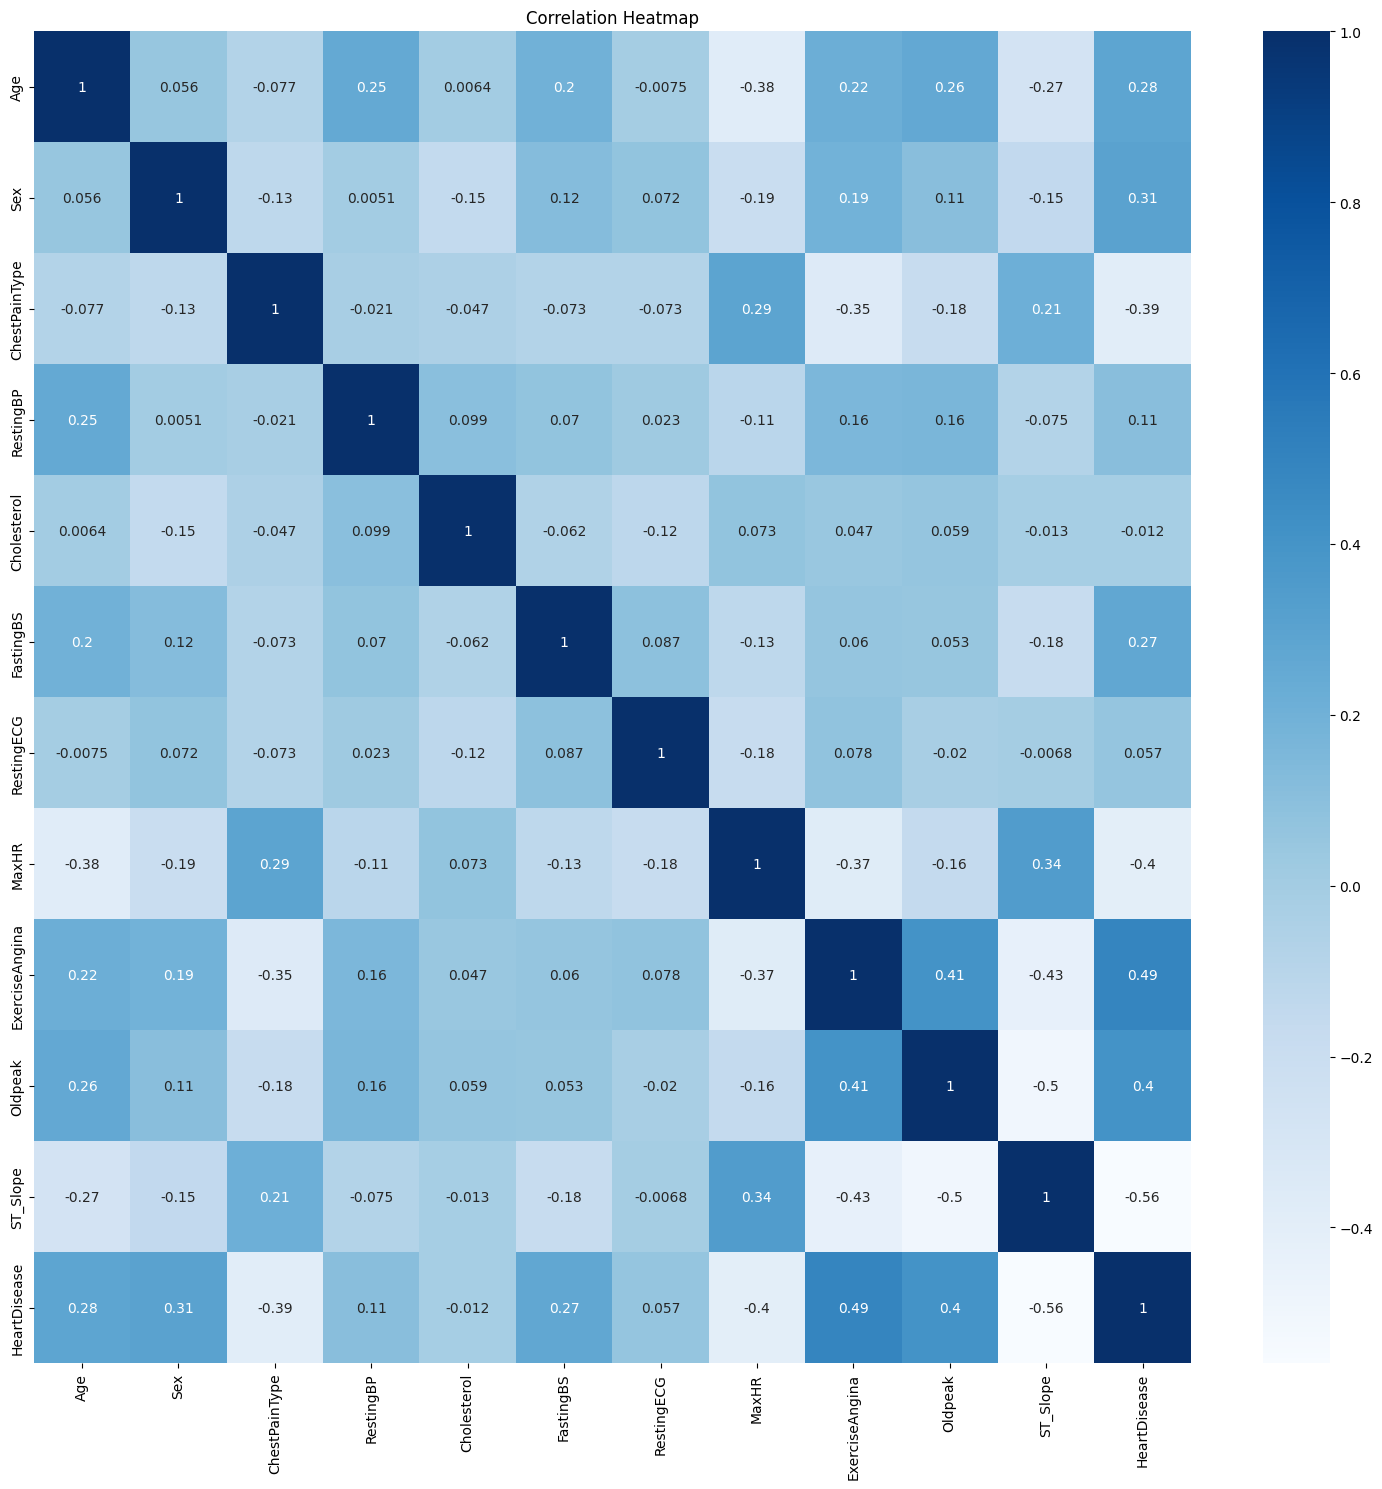

In [16]:
fig, axes = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='Blues', ax=axes)
axes.set_title('Correlation Heatmap')
plt.tight_layout()
plt.show()

#### Split the data into train and test

In [17]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Get test set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

### Train the models

In [26]:
def get_preds_probs(model, X, y):
  y_pred = model.predict(X)
  y_prob = model.predict_proba(X)
  return accuracy_score(y, y_pred), precision_score(y, y_pred), recall_score(y, y_pred), f1_score(y, y_pred), log_loss(y, y_prob)

#### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)

acc_train, precision_train, recall_train, f1_train, log_loss_train = get_preds_probs(lr_model, X_train, y_train)
acc_val, precision_val, recall_val, f1_val, log_loss_val = get_preds_probs(lr_model, X_val, y_val)
acc_test, precision_test, recall_test, f1_test, log_loss_test = get_preds_probs(lr_model, X_test, y_test)

lr_results = pd.DataFrame({
    "Set": ["Train", "Validation", "Test"],
    "Accuracy": [acc_train, acc_val, acc_test],
    "Precision": [precision_train, precision_val, precision_test],
    "Recall": [recall_train, recall_val, recall_test],
    "F1 Score": [f1_train, f1_val, f1_test],
    "Log Loss": [log_loss_train, log_loss_val, log_loss_test]
})

print(lr_results.round(4))



          Set  Accuracy  Precision  Recall  F1 Score  Log Loss
0       Train    0.8330     0.8431  0.8536    0.8483    0.3910
1  Validation    0.8980     0.8652  0.9625    0.9112    0.2801
2        Test    0.8424     0.8980  0.8224    0.8585    0.3997


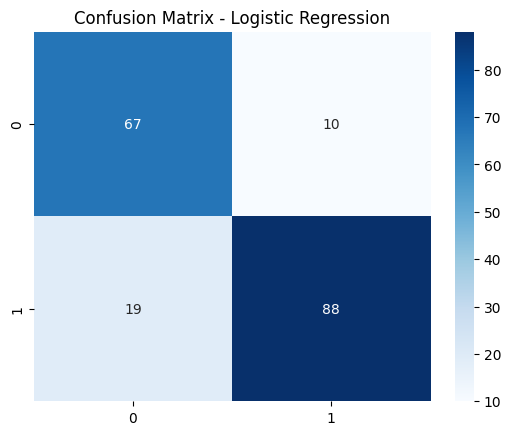

In [25]:
ax = sns.heatmap(confusion_matrix(y_test, lr_model.predict(X_test)), annot=True, cmap='Blues')
ax.set_title('Confusion Matrix - Logistic Regression')
plt.show()

#### K-Nearest Neighbour

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(X_train, y_train)

acc_train, precision_train, recall_train, f1_train, log_loss_train = get_preds_probs(knn_model, X_train, y_train)
acc_val, precision_val, recall_val, f1_val, log_loss_val = get_preds_probs(knn_model, X_val, y_val)
acc_test, precision_test, recall_test, f1_test, log_loss_test = get_preds_probs(knn_model, X_test, y_test)

knn_results = pd.DataFrame({
    "Set": ["Train", "Validation", "Test"],
    "Accuracy": [acc_train, acc_val, acc_test],
    "Precision": [precision_train, precision_val, precision_test],
    "Recall": [recall_train, recall_val, recall_test],
    "F1 Score": [f1_train, f1_val, f1_test],
    "Log Loss": [log_loss_train, log_loss_val, log_loss_test]
})

print(knn_results.round(4))


          Set  Accuracy  Precision  Recall  F1 Score  Log Loss
0       Train    0.8705     0.8551  0.9190    0.8859    0.2738
1  Validation    0.9048     0.8750  0.9625    0.9167    1.6305
2        Test    0.8587     0.9091  0.8411    0.8738    1.6079


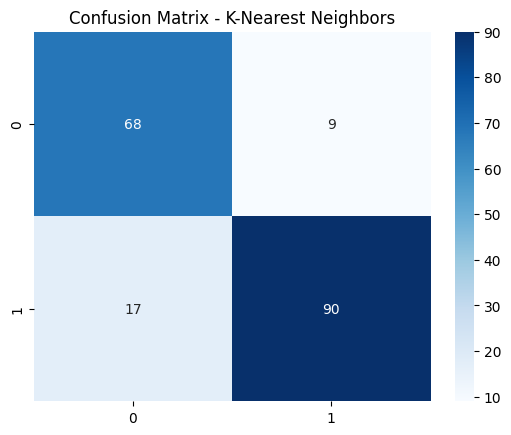

In [30]:
ax = sns.heatmap(confusion_matrix(y_test, knn_model.predict(X_test)), annot=True, cmap='Blues')
ax.set_title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

#### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=4, random_state=42)
dt_model.fit(X_train, y_train)

acc_train, precision_train, recall_train, f1_train, log_loss_train = get_preds_probs(dt_model, X_train, y_train)
acc_val, precision_val, recall_val, f1_val, log_loss_val = get_preds_probs(dt_model, X_val, y_val)
acc_test, precision_test, recall_test, f1_test, log_loss_test = get_preds_probs(dt_model, X_test, y_test)

dt_results = pd.DataFrame({
    "Set": ["Train", "Validation", "Test"],
    "Accuracy": [acc_train, acc_val, acc_test],
    "Precision": [precision_train, precision_val, precision_test],
    "Recall": [recall_train, recall_val, recall_test],
    "F1 Score": [f1_train, f1_val, f1_test],
    "Log Loss": [log_loss_train, log_loss_val, log_loss_test]
})

print(dt_results.round(4))

          Set  Accuracy  Precision  Recall  F1 Score  Log Loss
0       Train    0.8876     0.8783  0.9221    0.8997    0.2626
1  Validation    0.8844     0.8621  0.9375    0.8982    1.0415
2        Test    0.8261     0.8713  0.8224    0.8462    1.8863


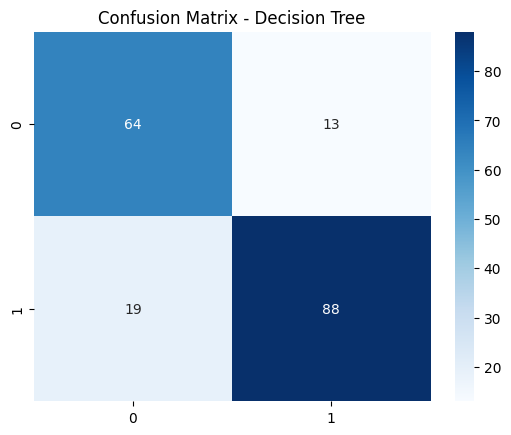

In [77]:
ax = sns.heatmap(confusion_matrix(y_test, dt_model.predict(X_test)), annot=True, cmap='Blues')
ax.set_title('Confusion Matrix - Decision Tree')
plt.show()